Load packages

In [1]:
!pip install pyopenms
!pip install plotly==4.8.0
!pip install matplotlib
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

Read mzML file, which will load the content of the “test.mzML” file into the exp variable of type MSExperiment. 

In [2]:
from pyopenms import *
from urllib.request import urlretrieve
# from urllib import urlretrieve  # use this code for Python 2.x
urlretrieve ("http://proteowizard.sourceforge.net/example_data/small.pwiz.1.1.mzML", "test.mzML")
exp = MSExperiment()
MzMLFile().load("test.mzML", exp)

File preview/inspection (optional)

In [3]:
# get overall info
print ("Number of spectra:", exp.getNrSpectra())
for spec in exp:
  print ("MS Level:", spec.getMSLevel())
print ("Number of chromatograms:", exp.getNrChromatograms())

Number of spectra: 48
MS Level: 1
MS Level: 1
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 1
MS Level: 1
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 1
MS Level: 1
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 1
MS Level: 1
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 1
MS Level: 1
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 1
MS Level: 1
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 1
MS Level: 1
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
Number of chromatograms: 1


MS Level: 1
RT : 0.4738
Total intensity: 12901288.8718941
Spectrum data: (array([ 200.09090909,  200.18181819,  200.27272728, ..., 1999.81823546,
       1999.90914455, 2000.00005364]), array([449.05173, 626.677  , 727.1613 , ...,   0.     ,   0.     ,
         0.     ], dtype=float32))


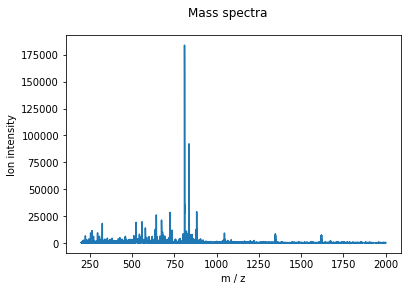

In [4]:
# get specific info of one spectra, in the example spectra [1]
print ("MS Level:", exp[1].getMSLevel())
print("RT :", exp[1].getRT())
spec = exp[1]
mz, intensity = spec.get_peaks()
print ("Total intensity:", sum(intensity))
spectrum_data = exp.getSpectrum(1).get_peaks()
print("Spectrum data:",spectrum_data)
# plot spectra
plt.plot(spectrum_data[0],spectrum_data[1])
plt.xlabel('m / z')
plt.ylabel('Ion intensity')
plt.suptitle('Mass spectra')
plt.show()

Chromatogram data: (array([ 0.2961,  0.4738,  0.6731,  1.3703,  2.0955,  2.9172,  3.7154,
        4.5009,  4.6673,  4.8722,  5.5742,  6.2882,  7.0329,  7.8013,
        8.6071,  8.7845,  8.9853,  9.6865, 10.4022, 11.1995, 12.0417,
       12.8204, 13.0048, 13.2044, 13.9754, 14.6847, 15.5503, 16.3598,
       17.129 , 17.3339, 18.2222, 18.939 , 19.7116, 20.5749, 21.5135,
       21.6857, 21.8853, 22.5947, 23.3204, 24.1177, 24.9079, 25.709 ,
       25.9933, 26.194 , 26.8992, 27.6339, 28.3862, 29.2342]), array([15245068.   , 12901166.   ,   586279.   ,   441570.16 ,
         114331.7  ,   130427.305,   580561.06 , 15148302.   ,
       10349958.   ,   848427.3  ,   456143.44 ,   124170.38 ,
         104264.8  ,   147409.23 , 18257344.   , 11037852.   ,
        1102582.1  ,   360250.97 ,   125874.83 ,   142243.39 ,
         147414.58 , 17613074.   ,  1597410.5  ,   990298.5  ,
         447647.97 ,    71677.03 ,   119999.74 ,   152281.25 ,
       22136832.   , 12434530.   ,   379009.78 ,   12047

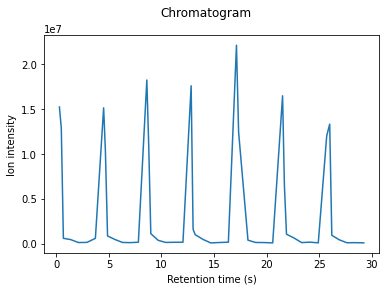

In [25]:
# get specific info of one chromatogram, in the example chromatogram [0]
chromatogram_data = exp.getChromatogram(0).get_peaks()
print("Chromatogram data:",chromatogram_data)
# plot chromatogram (TIC)
plt.plot(chromatogram_data[0],chromatogram_data[1])
plt.xlabel('Retention time (s)')
plt.ylabel('Ion intensity')
plt.suptitle('Chromatogram')
plt.show()

TIC calculation

In [6]:
# Calculates total ion current of an LC-MS/MS experiment
def calcTIC(exp, mslevel):
    tic = 0
    # Iterate through all spectra of the experiment
    for spec in exp:
        # Only calculate TIC for matching (MS1) spectra
        if spec.getMSLevel() == mslevel:
            mz, i = spec.get_peaks()
            tic += sum(i)
    return tic
# For spectra MS1
print ("Total ion current of MS1:",calcTIC(exp, 1))

Total ion current of MS1: 569609042.3306552


Filtering MS1 level only, which will only keep MS1 spectra in the MSExperiment. We can then store the modified data structure on disk

In [7]:
exp_in = MSExperiment()
exp_out = MSExperiment()

MzMLFile().load("test.mzML", exp_in)

chromatogram = MSChromatogram()

spectra_list = list()
chr_rt = list()
chr_i = list()

for s in exp.getSpectra():
    ms_level = s.getMSLevel()
    if ms_level == 1:
        spectra_list.append(s)
        
        rt = s.getRT()
        i = np.max(s.get_peaks()[1])
        
        chr_rt.append(rt)
        chr_i.append(i)
        
chromatogram.set_peaks([chr_rt, chr_i])

exp_out.setSpectra(spectra_list)
exp_out.addChromatogram(chromatogram)

MzMLFile().store("filtered_ms1.mzML", exp_out)

Loading and previewing new filtered file

In [8]:
# load the new file
exp_filtered = MSExperiment()
MzMLFile().load("filtered_ms1.mzML", exp_filtered)
# inspecting the new file
print ("Number of spectra:", exp_filtered.getNrSpectra())

Number of spectra: 14


In [9]:
# new file info for spectra 1
spectrum_data_1 = exp_filtered.getSpectrum(1).get_peaks()
chromatogram_data_1 = exp_filtered.getChromatogram(0).get_peaks()
print("Spectrum data:",spectrum_data_1)
print("Chromatogram data:",chromatogram_data_1)

Spectrum data: (array([ 200.09090909,  200.18181819,  200.27272728, ..., 1999.81823546,
       1999.90914455, 2000.00005364]), array([449.05173, 626.677  , 727.1613 , ...,   0.     ,   0.     ,
         0.     ], dtype=float32))
Chromatogram data: (array([ 0.2961,  0.4738,  4.5009,  4.6673,  8.6071,  8.7845, 12.8204,
       13.0048, 17.129 , 17.3339, 21.5135, 21.6857, 25.709 , 25.9933]), array([1471224.9  ,  183838.72 , 1651648.4  ,  143063.16 , 2027061.1  ,
        134546.1  , 2037945.   ,   20583.182, 2637890.8  ,  189316.16 ,
       1738482.6  ,  105772.07 , 1346706.   ,  174472.94 ], dtype=float32))


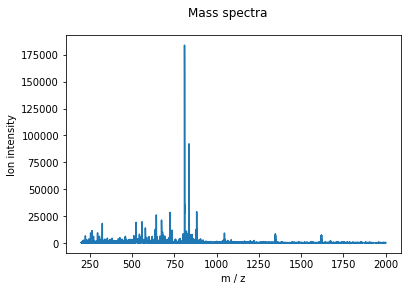

In [10]:
# plotting MS1 spectra for spectra 1
plt.plot(spectrum_data_1[0],spectrum_data_1[1])
plt.xlabel('m / z')
plt.ylabel('Ion intensity')
plt.suptitle('Mass spectra')
plt.show()

In [22]:
# plotting interactive MS1 spectra for spectra 1
fig = go.Figure(
    data=[go.Scatter(x=spectrum_data_1[0],y=spectrum_data_1[1])])
fig.update_layout(title_text='Mass spectra')
fig.update_xaxes(title_text='m / z')
fig.update_yaxes(title_text='Ion intensity')
fig.show()

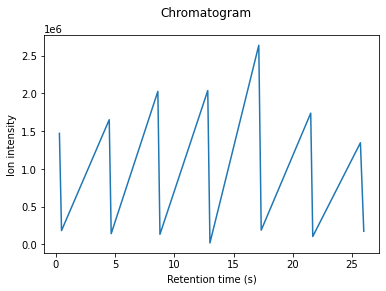

In [12]:
# plotting chromatogram (TIC) with MS1 spectra
plt.plot(chromatogram_data_1[0],chromatogram_data_1[1])
plt.xlabel('Retention time (s)')
plt.ylabel('Ion intensity')
plt.suptitle('Chromatogram')
plt.show()

In [23]:
# plotting interactive chromatogram (TIC) with MS1 spectra
fig = go.Figure(data=go.Scatter(x=chromatogram_data_1[0],y=chromatogram_data_1[1]))
fig.update_layout(title_text='Chromatogram')
fig.update_xaxes(title_text='Retention time (s)')
fig.update_yaxes(title_text='Ion intensity')
fig.show()

BPC calculation

In [13]:
from plotly.subplots import make_subplots
from ipywidgets import interact
import ipywidgets as widgets

fig = make_subplots(rows=2, cols=1)

exp = MSExperiment()
MzMLFile().load("test.mzML", exp)

chromatogram_data = exp.getChromatogram(0).get_peaks()
spectrum_data = exp.getSpectrum(0).get_peaks()

trace1 = go.Scatter(
x = chromatogram_data[0],
y = chromatogram_data[1],
name = 'chromatogram',
)
trace2 = go.Scatter(
x = spectrum_data[0],
y = spectrum_data[1],
name = 'MS Spectrum',
)
fig.add_trace(trace1, 1, 1)
fig.add_trace(trace2, 2, 1)

num_spectra = int(exp.getNrSpectra())

def update(a=0):
 spectrum_data = exp.getSpectrum(a).get_peaks()
fig.data[1].x = spectrum_data[0]
fig.data[1].y = spectrum_data[1]
fig.show()

interact(update,a= widgets.IntSlider(min=-0, max=num_spectra-1, step=1, value=0))


interactive(children=(IntSlider(value=0, description='a', max=47), Output()), _dom_classes=('widget-interact',…

<function __main__.update(a=0)>